In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from IPython.display import clear_output
import matplotlib.pyplot as plt

/home/intel-workshop/Moscow/miniconda3/envs/tf_intel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D

In [4]:
from keras.optimizers import RMSprop, Adam, SGD

In [1]:
import numpy as np
import os

In [2]:
%matplotlib inline

In [3]:
import os
os.environ["KMP_BLOCKTIME"] = str(0)
os.environ["KMP_SETTINGS"] = str(1)
os.environ["KMP_AFFINITY"]= str("verbose,warnings,respect,granularity=fine,compact,1,0")

# 1. Классификация цифр:

## 1.1. Загрузка данных:

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 1.2 Разделение на обучающую и тестирующую выборки:

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

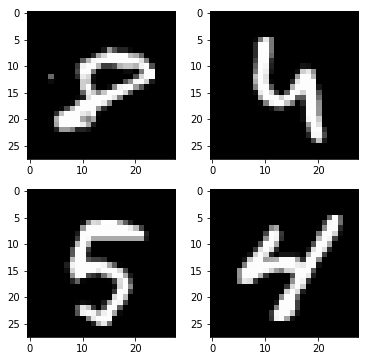

In [9]:
nb_images = 60000
fig = plt.figure(figsize = (6, 6))
for i in range(1, 4 + 1):
    fig.add_subplot(2, 2, i)
    k = np.random.choice(nb_images)
    plt.imshow(train_images[k].reshape((28,28)), cmap = 'gray')

## 1.3 Линейная модель:

In [4]:
linear_model = Sequential()

linear_model.add(Flatten(input_shape=(28, 28, 1)))
linear_model.add(Dense(10, activation='softmax'))

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


NameError: name 'Sequential' is not defined

In [11]:
linear_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
linear_model.compile(optimizer=Adam(),
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

In [15]:
linear_model.fit(train_images,
                 train_labels,
                 epochs = 5,
                 batch_size = 256)

Epoch 1/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.3954 - acc: 0.8931
Epoch 2/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.3336 - acc: 0.9076
Epoch 3/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.3099 - acc: 0.9137
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.2970 - acc: 0.9169
Epoch 5/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.2879 - acc: 0.9198


In [16]:
print('Accuracy on train images: {}'.format(linear_model.evaluate(train_images, train_labels)[1]))
print('Accuracy on test images: {}'.format(linear_model.evaluate(test_images, test_labels)[1]))

60000/60000 [==============================] - 6s 102us/step
Accuracy on train images: 0.9209
10000/10000 [==============================] - 1s 73us/step
Accuracy on test images: 0.923


#### Неплохо, но можно ли лучше?

### 1.4 Сверточная нейронная сеть:

In [17]:
conv_model = Sequential()

conv_model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
conv_model.add(MaxPooling2D((2, 2)))

conv_model.add(Conv2D(32, (3, 3), activation = 'relu'))
conv_model.add(MaxPooling2D((2, 2)))
conv_model.add(Conv2D(32, (3, 3), activation = 'relu'))

conv_model.add(Flatten())
conv_model.add(Dense(64, activation = 'relu'))
conv_model.add(Dense(10, activation = 'softmax'))

In [18]:
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                18496     
__________

In [19]:
conv_model.compile(optimizer=Adam(),
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

In [23]:
conv_model.fit(train_images,
               train_labels,
               epochs = 5,
               batch_size=256)

Epoch 1/5
60000/60000 [==============================] - 31s 518us/step - loss: 0.3236 - acc: 0.9030
Epoch 2/5
60000/60000 [==============================] - 30s 497us/step - loss: 0.1061 - acc: 0.9678
Epoch 3/5
60000/60000 [==============================] - 33s 545us/step - loss: 0.0708 - acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 28s 467us/step - loss: 0.0572 - acc: 0.9828
Epoch 5/5
60000/60000 [==============================] - 27s 457us/step - loss: 0.0485 - acc: 0.9853


In [37]:
print('Accuracy on train images: {}'.format(conv_model.evaluate(train_images, train_labels)[1]))
print('Accuracy on test images: {}'.format(conv_model.evaluate(test_images, test_labels)[1]))

60000/60000 [==============================] - 9s 154us/step
Accuracy on train images: 0.9843
10000/10000 [==============================] - 2s 176us/step
Accuracy on test images: 0.9834


# 2. Классификация dog vs cat:

## 2.1 Загрузим данные и сделаем аугментацию:

Будем теперь использовать генератор для данных, который позволяет удобно взаимодействовать с обучающими данными:
- Подгружает данные батчами с диска, не занимая таким образом оперативную память 
- Выполняет предобработку данных, например, нормирует пиксели изображения, чтобы они лежали в [0;1]
- Делает аугментацию данных: поворачивает, отражает, обрезает картинки 

In [39]:
datagen = ImageDataGenerator(
        rotation_range=40,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

На одной картинке посмотрим, что делает такой генератор данных:

In [40]:
img = load_img('small_train/train/cats/cat.3.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, height, )
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

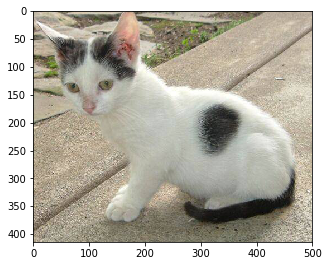

In [41]:
plt.figure(figsize=(5, 5))
plt.imshow(img)

<Figure size 4320x4320 with 0 Axes>

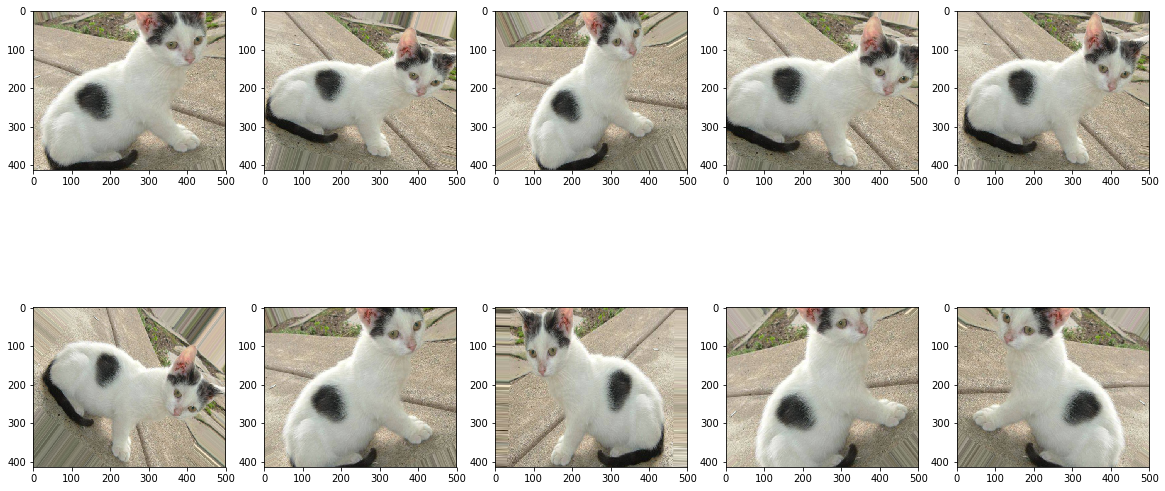

In [42]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory

plt.figure(figsize=(60, 60))
fig, axs = plt.subplots(ncols=5, nrows=2)
i = 0
fig.set_size_inches(20, 10)
for batch in datagen.flow(x, batch_size=1):
    axs[i%2,i%5].imshow(batch[0]) 
    i += 1
    if i > 10:
        break

Создадим теперь такие генераторы для обучающей и валидационной выборки:

In [7]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing/validating:
# only rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'small_train/train',  # this is the target directory
        target_size=(100, 100),  # all images will be resized to 100x100
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
        'small_train/val',
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 2.2 Модель

Зададим простую сверточную модель:

In [68]:
def create_model():    
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(100, 100, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    return model

In [74]:
model = create_model()

In [75]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

## 2.3 Обучение модели

Вспомогательная функция для построения графика обучения:

In [28]:
def plot_history(acc, val_acc, loss, val_loss):
    # summarize history for loss
    plt.plot(loss)
    plt.plot(val_loss)

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    
    # summarize history for accuracy
    plt.plot(acc)
    plt.plot(val_acc)
    
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### Обучение модели: 

For fitting you can use one of Keras optimizer algorithms. [Good overview](http://ruder.io/optimizing-gradient-descent/)

To choose best learning rate strategy you should read about EarlyStopping and ReduceLROnPlateau or LearningRateScheduler on [callbacks](https://keras.io/callbacks/) page of keras documentation, it's very useful in deep learning.

If you repeat architecture from some paper, you can find information about good optimizer algorithm and learning rate strategy in this paper. For example, every [keras application](https://keras.io/applications/) has link to paper, that describes suitable learning procedure for this specific architecture.

In [76]:
def fit_model(model, train_generator, validation_generator, model_name=None, output_dir="checkpoints",\
              class_weight=None, epochs=25,verbose=False):
    """Fit model.
    """
    acc, val_acc = [],[]
    loss, val_loss = [],[]
    for i in range(epochs):
        history = model.fit_generator(
            train_generator,
            steps_per_epoch=2000 // batch_size,
            epochs=i+1,
            initial_epoch=i,
            validation_data=validation_generator,
            validation_steps=1000 // batch_size)

        acc.append(history.history['acc'])
        val_acc.append(history.history['val_acc'])
        
        loss.append(history.history['loss'])
        val_loss.append(history.history['val_loss'])
        clear_output()
        plot_history(acc, val_acc, loss, val_loss)

In [78]:
model = create_model()
model.compile(optimizer=Adam(), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

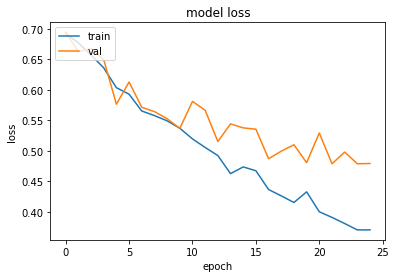

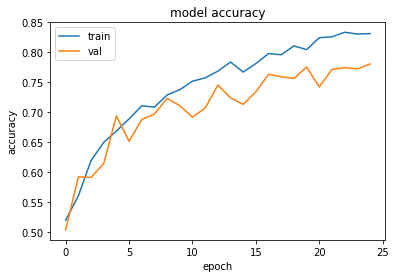

In [79]:
fit_model(model,
          train_generator,
          validation_generator)

## 2.4 Визуализируем полученные результаты:

In [ ]:
img_names = [os.listdir('inference_folder')]

for name in img_names:
    img = load_img('inference_folder/' + name)  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, height, )
    x = x.reshape((1,) + x.shape)
    
    predic

# 3. Дообучение головы модели:

In [8]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

## 3.1 Подгружаем веса модели, которую хотим использовать:

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

In [10]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

## 3.2 Извлекаем признаки из промежуточного слоя модели:

In [21]:
def extract_features(generator, batch_size, sample_count):
    features = np.zeros(shape = (sample_count, 3 * 3 * 512))
    labels = np.zeros(sample_count)
    
    n = 0
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch) 
        features[n * batch_size: n * batch_size + features_batch.shape[0]] = features_batch.reshape((features_batch.shape[0], 3 * 3 * 512))
        labels[n * batch_size: n * batch_size + features_batch.shape[0]] = labels_batch
        n += 1
        if n * batch_size >= sample_count:
            break
    return features, labels

In [22]:
train_features, train_labels = extract_features(train_generator, 32, 2000)

In [23]:
val_features, val_labels = extract_features(validation_generator, 32, 1000)

## 3.3 Задаем простую однослойную модель: 

In [64]:
small_model = Sequential()

small_model.add(Dense(256, activation = 'relu', input_dim = 3 * 3 * 512))
small_model.add(Dropout(0.5))
small_model.add(Dense(1, activation = 'sigmoid'))

## 3.4 Обучение модели:

In [65]:
small_model.compile(optimizer = Adam(lr=2e-5),
                    loss = 'binary_crossentropy',
                    metrics = ['acc'])

In [66]:
history = small_model.fit(train_features, train_labels, 
                          validation_data=(val_features, val_labels),
                          epochs = 15,
                          batch_size=32)

Train on 2000 samples, validate on 1000 samples
Epoch 1/15
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6728 - acc: 0.5975 - val_loss: 0.5538 - val_acc: 0.7580
Epoch 2/15
2000/2000 [==============================] - 1s 646us/step - loss: 0.5644 - acc: 0.7055 - val_loss: 0.4936 - val_acc: 0.7840
Epoch 3/15
2000/2000 [==============================] - 1s 513us/step - loss: 0.5178 - acc: 0.7500 - val_loss: 0.4566 - val_acc: 0.8010
Epoch 4/15
2000/2000 [==============================] - 1s 564us/step - loss: 0.4800 - acc: 0.7785 - val_loss: 0.4301 - val_acc: 0.8220
Epoch 5/15
2000/2000 [==============================] - 1s 513us/step - loss: 0.4544 - acc: 0.7925 - val_loss: 0.4129 - val_acc: 0.8320
Epoch 6/15
2000/2000 [==============================] - 1s 625us/step - loss: 0.4287 - acc: 0.8100 - val_loss: 0.4022 - val_acc: 0.8370
Epoch 7/15
2000/2000 [==============================] - 1s 538us/step - loss: 0.4057 - acc: 0.8255 - val_loss: 0.3918 - val_acc: 0.8410
Ep

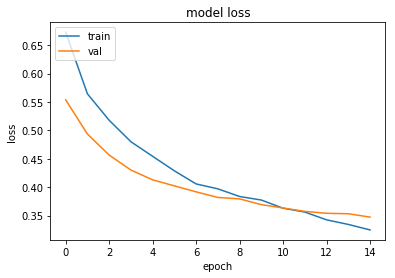

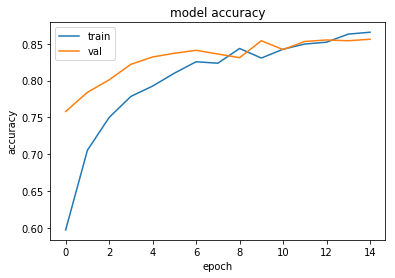

In [67]:
plot_history(history.history['acc'], history.history['val_acc'], history.history['loss'], history.history['val_loss'])

Легко достигли хорошего качества на расматриваемой выборке.